In [1]:
import numpy as np
import src.solutions.eigenmodes_part1 as eigen_part1
import src.visualizations as vis
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
from scipy.sparse import csr_matrix

In [ ]:
N = 5

In [ ]:
initial_matrix = eigen_part1.create_init_matrix_a(N)
print(initial_matrix)

In [ ]:
N = 100

initial_circle = eigen_part1.create_circle(N)
dependency_circle = eigen_part1.create_circle_dependency(N, initial_circle)
initial_matrix = eigen_part1.create_init_matrix_a(N)
print(dependency_circle)

vis.visualize_mesh(initial_matrix)
vis.visualize_mesh(initial_circle)
vis.visualize_mesh(dependency_circle)


In [ ]:
N = 50
initial_square = eigen_part1.create_init_matrix_a(N)

initial_circle = eigen_part1.create_circle(N)
dependency_circle = eigen_part1.create_circle_dependency(N, initial_circle)

initial_rectangle = eigen_part1.create_init_matrix_a(N, rectangular=True)

eigenvalues_sq, eigenvectors_sq = eigsh(initial_square, k=3, which="SM")
eigenvalues_circ, eigenvectors_circ = eigsh(dependency_circle, k=3, which="SM")
eigenvalues_rect, eigenvectors_rect = eigsh(initial_rectangle, k=3, which="SM")

vis.visualize_different_shapes(eigenvectors_sq, eigenvalues_sq, eigenvectors_circ, eigenvalues_circ, eigenvectors_rect, eigenvalues_rect, N)


#### 3.1 D Computed eigenfrequencies as a function of size \( L \) for three different shapes: Square, Circle, and Rectangle. The eigenvalues are computed and only the negative eigenvalues are used to determine the eigenfrequencies as \( \omega = \sqrt{-\lambda} \). The results are plotted to analyze how the eigenfrequency spectrum changes with increasing \( L \).

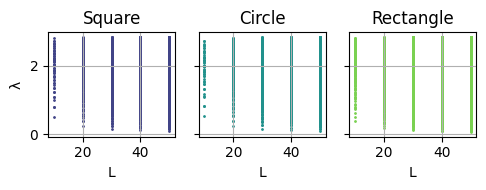

In [2]:
# Parameters
sizes = [10, 20, 30, 40, 50] # L

# Dictionaries to store eigenfrequencies
eigenfrequencies_sq = {}
eigenfrequencies_circ = {}
eigenfrequencies_rect = {}

for N in sizes:
    # Square
    initial_sq = eigen_part1.create_init_matrix_a(N)
    eigenvalues_sq, _ = eigh(initial_sq)
    negative_eigenvalues_sq = eigenvalues_sq[eigenvalues_sq < 0] # only use negative eigenvalues for eigenfrequencies
    eigenfrequencies_sq[N] = np.sqrt(-negative_eigenvalues_sq) if len(negative_eigenvalues_sq) > 0 else []

    # Circle
    initial_circ = eigen_part1.create_circle(N)
    matrix_circ = eigen_part1.create_circle_dependency(N, initial_circ)
    sparse_matrix_circle = csr_matrix(matrix_circ)
    num_eigenvalues = sparse_matrix_circle.shape[0]
    eigenvalues_circ, _ = eigsh(sparse_matrix_circle, k=num_eigenvalues - 1, which="SM")
    negative_eigenvalues_circ = eigenvalues_circ[eigenvalues_circ < 0] # only use negative eigenvalues for eigenfrequencies
    eigenfrequencies_circ[N] = np.sqrt(-negative_eigenvalues_circ) if len(negative_eigenvalues_circ) > 0 else []

    # Rectangle
    initial_rect = eigen_part1.create_init_matrix_a(N, rectangular=True)
    eigenvalues_rect, _ = eigh(initial_rect)
    negative_eigenvalues_rect = eigenvalues_rect[eigenvalues_rect < 0] # only use negative eigenvalues for eigenfrequencies
    eigenfrequencies_rect[N] = np.sqrt(-negative_eigenvalues_rect) if len(negative_eigenvalues_rect) > 0 else []

vis.eigenfrequencies_plot(sizes, eigenfrequencies_sq, eigenfrequencies_circ, eigenfrequencies_rect)
